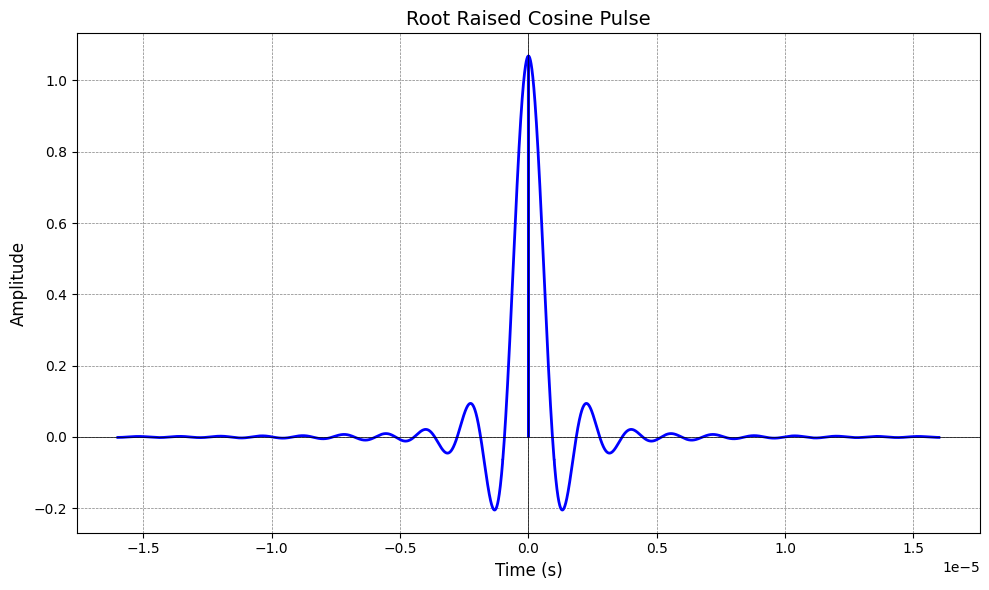

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def root_raised_cosine(t, Ts, beta):
    """
    Generate a Root Raised Cosine (RRC) pulse shaping function.

    Parameters:
    - t (numpy.ndarray): Time vector.
    - Ts (float): Symbol period.
    - beta (float): Excess bandwidth parameter.

    Returns:
    numpy.ndarray: RRC pulse shape evaluated at each time point in t.
    """
    numerator = np.sin(np.pi * t / Ts * (1 - beta)) + 4 * beta * t / Ts * np.cos(np.pi * t / Ts * (1 + beta))
    denominator = np.pi * t / Ts * (1 - (4 * beta * t / Ts) ** 2)
    return numerator / denominator

# Parameters
fc = 100e6  # Carrier Frequency
Ts = 1e-6   # Symbol Period
beta = 0.25 # Excess Bandwidth
N = 8       # Number of symbols

# Time vector
t = np.arange(-2 * N * Ts, 2 * N * Ts, 1 / (2 * fc))

# Zero crossing and shift for +-Ts/(4*beta)
zc = len(t) // 2
shift = len(np.arange(0, Ts / (4 * beta), 1 / (2 * fc))) + 1

# Root Raised Cosine pulse
p = root_raised_cosine(t, Ts, beta)
p[zc] = Ts * (1 + beta * (4 / np.pi - 1))
p[zc + shift] = (beta / np.sqrt(2)) * ((1 + 2 / np.pi) * np.sin(np.pi / (4 * beta)) + (1 - 2 / np.pi) * np.cos(np.pi / (4 * beta)))
p[zc - shift] = p[zc + shift]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, p, color='blue', linestyle='-', linewidth=2, label=r"Root Raised Cosine, $\beta$ = 0.25")
plt.xlabel("Time (s)", fontsize=12)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.title("Root Raised Cosine Pulse", fontsize=14)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()



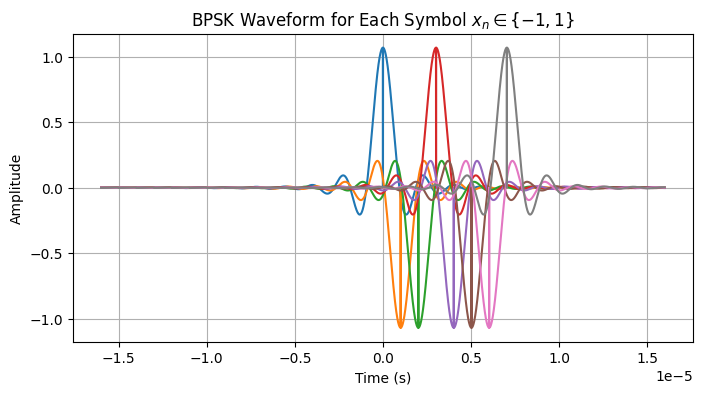

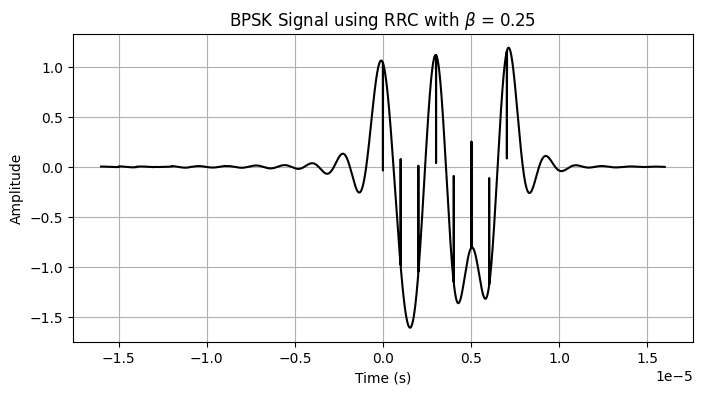

In [4]:
# Given BPSK sequence
x_n = np.array([1, -1, -1, 1, -1, -1, -1, 1])

# Initialize variables for shifted pulse, interval, and BPSK signal
shifted_p = np.zeros(len(t))
interval = len(np.arange(0, Ts, 1 / (2 * fc))) + 1
x_t = np.zeros(len(t))

# BPSK Waveform for Each Symbol
plt.figure(figsize=(8, 4))
plt.tight_layout()

# Iterate over each symbol in the BPSK sequence
for i in range(N):
    # Shift and update the pulse for each symbol
    shifted_p[interval * i : len(p)] = p[0 : len(p) - interval * i]
    
    # Accumulate the BPSK signal
    x_t += x_n[i] * shifted_p
    
    # Plot the BPSK waveform for each symbol
    plt.plot(t, x_n[i] * shifted_p, linewidth=1.5)

# Set plot labels, title, and grid
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("BPSK Waveform for Each Symbol $x_n \in \{-1, 1\}$")
plt.grid()

#display the plot
plt.show()

# BPSK Signal using RRC with beta = 0.25
plt.figure(figsize=(8, 4))
plt.plot(t, x_t, "k-", linewidth=1.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("BPSK Signal using RRC with $\\beta$ = 0.25")
plt.grid()

# Save and display the plot
plt.show()

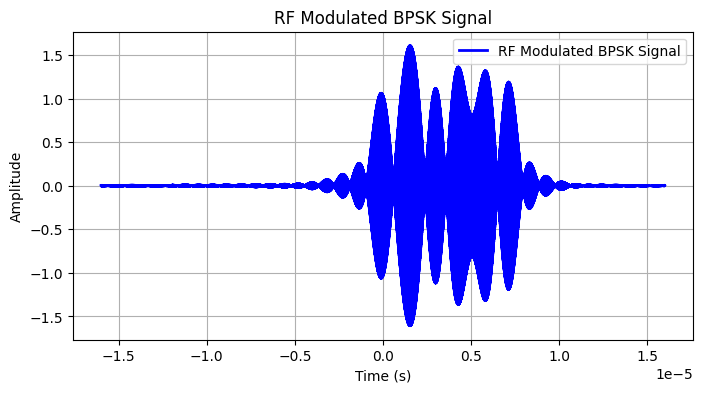

In [5]:
modulated_signal = x_t * np.cos(2 * np.pi * fc * t)
# Plot the RF Modulated BPSK Signal
plt.figure(figsize=(8, 4))
plt.plot(t, modulated_signal, color='blue', linestyle='-', linewidth=2, label='RF Modulated BPSK Signal')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("RF Modulated BPSK Signal")
plt.grid(True)
plt.legend()
plt.show()